In [9]:
from textblob import TextBlob
import sys
import numpy as np
import snscrape.modules.twitter as sntwitter
from matplotlib import pyplot as plt

In [3]:

#Ham[0] 2007-09, 2010-2013, 2014-2016,2017-2020, 2021
#Seb[1] 2008-09, 2010-2013,2014-2018,2019-2020,2021
#Verstappen[2] 2015-2016,2016-2018,2019-2020, 2021 #10000 tweets per year


In [7]:
#version 2 with snscrape to scrape old tweets cause twitter api doesnt help
tweets = []
drivers = np.array(['Lewis Hamilton','Sebastian Vettel','Max Verstappen'])
years = 15 #zero indexed
for y in range(years):
    temptweetsfortheyear = []
    for d in drivers:
        temptweetsforcurrdriver = []
        curryear = 2007+y
        search_str = "%s since:%d-01-01 until:%d-12-31 lang:en" % (d,curryear,curryear)
        for i, tweet in enumerate(sntwitter.TwitterSearchScraper(search_str).get_items()):
            if i > 10000:
                break
            temptweetsforcurrdriver.append([d,tweet.date,tweet.id,tweet.content])
        temptweetsfortheyear.append(temptweetsforcurrdriver)
        print(search_str + "number of tweets" + str(len(temptweetsforcurrdriver)))
    tweets.append(temptweetsfortheyear)
tweets = np.array(tweets, dtype =object)

Lewis Hamilton since:2007-01-01 until:2007-12-31 lang:ennumber of tweets201
Sebastian Vettel since:2007-01-01 until:2007-12-31 lang:ennumber of tweets7
Max Verstappen since:2007-01-01 until:2007-12-31 lang:ennumber of tweets0
Lewis Hamilton since:2008-01-01 until:2008-12-31 lang:ennumber of tweets201
Sebastian Vettel since:2008-01-01 until:2008-12-31 lang:ennumber of tweets201
Max Verstappen since:2008-01-01 until:2008-12-31 lang:ennumber of tweets0
Lewis Hamilton since:2009-01-01 until:2009-12-31 lang:ennumber of tweets201
Sebastian Vettel since:2009-01-01 until:2009-12-31 lang:ennumber of tweets201
Max Verstappen since:2009-01-01 until:2009-12-31 lang:ennumber of tweets6
Lewis Hamilton since:2010-01-01 until:2010-12-31 lang:ennumber of tweets201
Sebastian Vettel since:2010-01-01 until:2010-12-31 lang:ennumber of tweets201
Max Verstappen since:2010-01-01 until:2010-12-31 lang:ennumber of tweets31
Lewis Hamilton since:2011-01-01 until:2011-12-31 lang:ennumber of tweets201
Sebastian Vet

In [ ]:
#tweets[year][driver][tweetno][attribute]
#attributes 0 = driver, 1= tweet date,2 = tweet id, 3 = tweet text
print(tweets[2][1][200][3])

In [8]:
#Lewis is index 0, Seb is index 1, Max is index 2
positives = [] 
negatives = []
neutral = []
polarities = []

#polarities[year][driver]
#neutrals[year][driver]
#positives[year][driver]
#negatives[year][driver]

for y in range(years):
    temppositiveyear = []
    tempnegativeyear = []
    tempneutralyear = []
    temppolarityyear = []
    for d in range(len(drivers)):
        temppositive = 0
        tempnegative = 0
        tempneutral = 0
        temppolarity = 0        
        for i in tweets[y][d]:
            cleaned  =  i[3].replace('RT','')
            if (cleaned.startswith(' @')):
                pos = cleaned.index('')
                cleaned = cleaned[pos+2:]
            if (cleaned.startswith('@')):
                pos = cleaned.index('')
                cleaned = cleaned[pos+2:]        
            currBlobToAnalyse = TextBlob(cleaned)
            currpolarity = currBlobToAnalyse.polarity
            if (currpolarity > 0.00):
                temppositive += 1
            elif (currpolarity < 0.00):
                tempnegative += 1
            elif (currpolarity == 0.00):
                tempneutral += 1
            temppolarity += currpolarity
        temppositiveyear.append(temppositive)
        tempnegativeyear.append(tempnegative)
        tempneutralyear.append(tempneutral)
        temppolarityyear.append(temppolarity)
    positives.append(temppositiveyear)
    negatives.append(tempnegativeyear)
    neutral.append(tempneutralyear)
    polarities.append(temppolarityyear)
print(polarities)
positives = np.array(positives)
negatives = np.array(negatives)
neutral = np.array(neutral)
polarities = np.array(polarities)

[[31.190809132996637, 0.16136363636363635, 0], [22.23946067821068, 41.603996155753954, 0], [29.055118145743155, 25.538903544372296, 0.12878787878787873], [22.787229707322474, 29.044895382395392, 2.9738636363636366], [74.4042425369769, 41.17544191919191, 1.7638762626262627], [38.297361430525484, 44.35361616161613, 31.761337447274947], [35.45087436868686, 4.895575171356423, 37.93974837662339], [32.35750278078402, -5.958128908128906, 10.260616883116887], [50.62851445429569, 38.264231601731645, 37.06895310527146], [27.3403438401876, 28.558288412975894, 29.28262085137087], [23.48519072420636, 22.340853174603165, 31.160549918831162], [40.208882477114905, 30.76795867905243, 28.675882635882637], [29.859819449730157, 33.39805897516836, 21.694608059764306], [26.451745806277074, 14.596485551485559, 14.573651915214421], [25.482180848665234, 34.64612760792448, 33.14562905844157]]


In [18]:
yearlabels = np.array(['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
polarities.T[0]

array([31.19080913, 22.23946068, 29.05511815, 22.78722971, 74.40424254,
       38.29736143, 35.45087437, 32.35750278, 50.62851445, 27.34034384,
       23.48519072, 40.20888248, 29.85981945, 26.45174581, 25.48218085])

In [42]:
def plotlinegraph(x,y,title,xlabel,ylabel,savefilenamewithextension):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x,y)
    plt.savefig(savefilenamewithextension)

def plotbargraph(x,y,title,xlabel,ylabel,savefilenamewithextension):
    plt.bar(x,y,align = 'center')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(savefilenamewithextension)
    
def plotmanybargraph(x,y,y2,y3,title,xlabel,ylabel,savefilenamewithextension):
    plt.bar(x,y,color = 'c')
    plt.bar(x,y2,color = 'r')
    plt.bar(x,y3, color = 'b')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(labels=['Lewis Hamilton', 'Sebastian Vettel','Max Verstappen'])
    plt.savefig(savefilenamewithextension)

def plotmanylinegraph(x,y,y2,y3,title,xlabel,ylabel,savefilenamewithextension):
    plt.plot(x,y,color = 'c')
    plt.plot(x,y2,color = 'r')
    plt.plot(x,y3, color = 'b')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(labels=['Lewis Hamilton', 'Sebastian Vettel','Max Verstappen'])
    plt.savefig(savefilenamewithextension)

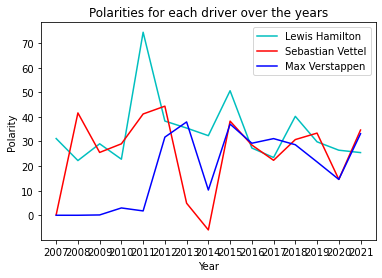

In [43]:

plotmanylinegraph(yearlabels,polarities.T[0],polarities.T[1],polarities.T[2],'Polarities for each driver over the years','Year','Polarity','Polarities over the years with all 3 drivers.png')